In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_csv("/content/weather_classification_data.csv")

In [3]:
data.shape

(13200, 11)

In [4]:
data.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


#Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is the process of examining and visualizing a dataset to understand its structure, patterns, and relationships before applying any machine learning models. It helps identify missing values, outliers, data inconsistencies, and correlations among variables. Through statistical summaries and graphical representations, EDA provides meaningful insights that guide data cleaning, feature selection, and model-building decisions.


In [5]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [6]:
data.dropna(inplace=True)
data.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [7]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13195,False
13196,False
13197,False
13198,False


In [8]:
unique_summary = pd.DataFrame({
    'Column': data.columns,
    'Unique Values': [data[col].nunique() for col in data.columns],
    'Data Type': [data[col].dtype for col in data.columns]
})
unique_summary


,Column,Unique Values,Data Type
0,Temperature,126,float64
1,Humidity,90,int64
2,Wind Speed,97,float64
3,Precipitation (%),110,float64
4,Cloud Cover,4,object
5,Atmospheric Pressure,5456,float64
6,UV Index,15,int64
7,Season,4,object
8,Visibility (km),41,float64
9,Location,3,object


## **Encode Categorical Columns**

Categorical columns contain **non-numeric values** such as strings or labels (e.g., `clear`, `Winter`, `inland`). Machine learning models **require numeric input**, so these columns must be converted into numbers.

**Purpose:**

* Transform categorical data into a **machine-readable format**.
* Ensure all features can be used for **model training and prediction**.
* Preserve the **relationship or distinction between categories** (e.g., clear → 1, partly cloudy → 2) for meaningful analysis.

**Example in Weather Prediction Project:**

* `Cloud Cover`: clear → 1, partly cloudy → 2, overcast → 3, cloudy → 4
* `Season`: Winter → 1, Spring → 2, Summer → 3, Autumn → 4
* `Location`: inland → 1, coastal → 2, mountain → 3
* `Weather Type (Target)`: Sunny → 1, Cloudy → 2, Rainy → 3, Stormy → 4

This step ensures the dataset is **fully numeric** and ready for training classification models.


In [9]:
# Encode categorical columns manually

data['Cloud Cover'] = data['Cloud Cover'].replace(['clear', 'partly cloudy', 'overcast', 'cloudy'], [1, 2, 3, 4])
data['Season'] = data['Season'].replace(['Winter', 'Spring', 'Summer', 'Autumn'], [1, 2, 3, 4])
data['Location'] = data['Location'].replace(['inland', 'coastal', 'mountain'], [1, 2, 3])

# Encode target variable (Weather Type)
data['Weather Type'] = data['Weather Type'].replace(['Sunny', 'Cloudy', 'Rainy', 'Snowy'], [1, 2, 3, 4])

# Display first few rows
data.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,2,1010.82,2,1,3.5,1,3
1,39.0,96,8.5,71.0,2,1011.43,7,2,10.0,1,2
2,30.0,64,7.0,16.0,1,1018.72,5,2,5.5,3,1
3,38.0,83,1.5,82.0,1,1026.25,7,2,1.0,2,1
4,27.0,74,17.0,66.0,3,990.67,1,1,2.5,3,3


### 🧩 **Split the Dataset**

Splitting the dataset into **training and testing sets** is an essential step in building a machine learning model.
The training set is used to teach the model, while the testing set evaluates how well the model generalizes to unseen data.

**Purpose:**

* Train the model on one portion of data.
* Test the model’s accuracy and performance on unseen data.
* Prevent overfitting and ensure reliable evaluation metrics.

**Example in Weather Prediction Project:**

* Training Set → 80% of the data (used to train the model)
* Testing Set → 20% of the data (used to test model performance)



In [10]:
# Import the required library
from sklearn.model_selection import train_test_split


y = data['Weather Type'].astype(int)
X = data.drop('Weather Type', axis=1)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (10560, 10)
Testing feature shape: (2640, 10)
Training target shape: (10560,)
Testing target shape: (2640,)


## **Model Training and Evaluation**

After preprocessing and splitting the dataset, the next step is to **train machine learning models** to predict the *Weather Type* based on input features such as temperature, humidity, and wind speed.

This step involves selecting suitable algorithms, training them on the training data, and evaluating their performance on the testing data.






### ⚙️ **Machine Learning Models Used**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize best score and model
best_score = -1
best_model_name = ""
best_model = None
metrics_list = []


#### 1. **Logistic Regression**

A simple yet powerful classification algorithm that predicts probabilities of classes using a logistic function.
It works well when there is a linear relationship between input features and the target variable.

In [12]:
# ------------------ Logistic Regression ------------------
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Logistic Regression:\nAccuracy: {acc_lr:.4f}, Precision: {prec_lr:.4f}, Recall: {recall_lr:.4f}, F1-Score: {f1_lr:.4f}\n")

score_lr = acc_lr + prec_lr + recall_lr + f1_lr  # simple combined score
if score_lr > best_score:
    best_score = score_lr
    best_model_name = "Logistic Regression"
    best_model = model_lr



Logistic Regression:
Accuracy: 0.8705, Precision: 0.8705, Recall: 0.8705, F1-Score: 0.8701



#### 2. **Decision Tree Classifier**

A tree-like model that splits data into branches based on feature values.
Each branch represents a decision rule, and the final nodes (leaves) represent class predictions.






In [13]:
# ------------------ Decision Tree ------------------
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree:\nAccuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}\n")

score_dt = acc_dt + prec_dt + recall_dt + f1_dt
if score_dt > best_score:
    best_score = score_dt
    best_model_name = "Decision Tree"
    best_model = model_dt



Decision Tree:
Accuracy: 0.9117, Precision: 0.9119, Recall: 0.9117, F1-Score: 0.9117



#### 3. **Random Forest Classifier**

An ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.
It gives better results than a single decision tree.



In [14]:
# ------------------ Random Forest ------------------
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest:\nAccuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}\n")

score_rf = acc_rf + prec_rf + recall_rf + f1_rf
if score_rf > best_score:
    best_score = score_rf
    best_model_name = "Random Forest"
    best_model = model_rf



Random Forest:
Accuracy: 0.9182, Precision: 0.9185, Recall: 0.9182, F1-Score: 0.9182



#### 4. **Support Vector Machine (SVM)**

A model that tries to find the best boundary (called a hyperplane) to separate classes.
It performs well in high-dimensional spaces and works effectively for classification problems.



In [15]:
# ------------------ SVM ------------------
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM:\nAccuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {recall_svm:.4f}, F1-Score: {f1_svm:.4f}\n")

score_svm = acc_svm + prec_svm + recall_svm + f1_svm
if score_svm > best_score:
    best_score = score_svm
    best_model_name = "SVM"
    best_model = model_svm



SVM:
Accuracy: 0.8284, Precision: 0.8332, Recall: 0.8284, F1-Score: 0.8278



#### 5. **Gradient Boosting Classifier**

An advanced ensemble method that builds models sequentially — each new model corrects the errors of the previous one.
It often provides excellent accuracy for structured data.

In [16]:
# ------------------ Gradient Boosting ------------------
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Gradient Boosting:\nAccuracy: {acc_gb:.4f}, Precision: {prec_gb:.4f}, Recall: {recall_gb:.4f}, F1-Score: {f1_gb:.4f}\n")

score_gb = acc_gb + prec_gb + recall_gb + f1_gb
if score_gb > best_score:
    best_score = score_gb
    best_model_name = "Gradient Boosting"
    best_model = model_gb



Gradient Boosting:
Accuracy: 0.9087, Precision: 0.9090, Recall: 0.9087, F1-Score: 0.9086



### 📊 **Purpose of Model Evaluation**

Model evaluation helps to:

* Measure how well the model generalizes to unseen data.
* Compare multiple algorithms to select the best one.
* Identify overfitting or underfitting issues early.


### 🧮 **Evaluation Metrics**

Evaluation metrics are used to **quantify the performance** of classification models.
They help determine how accurately a model predicts the correct weather type and how reliable its predictions are.

#### 1. **Accuracy**

Measures the overall correctness of the model.
It is the ratio of correctly predicted observations to the total observations.

                Accuracy = Correct Predictions / Total Predictions


Example: If the model correctly predicts 90 out of 100 samples, the accuracy is **90%**.

---

#### 2. **Precision**

Shows how many of the predicted positive cases were actually correct.
It focuses on the **quality** of positive predictions.

                  Precision = TP / (TP + FP)


*TP (True Positive)* = correctly predicted positive cases
*FP (False Positive)* = incorrectly predicted positive cases

---

#### 3. **Recall (Sensitivity)**

Measures how well the model identifies actual positive cases.
It focuses on **capturing all relevant positive samples**.

                    Recall = TP / (TP + FN)


*FN (False Negative)* = positive samples that were missed by the model

---

#### 4. **F1-Score**

Represents the balance between **precision** and **recall**.
It is especially useful when the class distribution is uneven.


           F1-Score = 2 * (Precision * Recall) / (Precision + Recall)



In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    score = acc + prec + recall + f1
    if score > best_score:
        best_score = score
        best_model_name = name
        best_model = model

    metrics_list.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    })

metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8705     0.8705  0.8705    0.8701
1        Decision Tree    0.9117     0.9119  0.9117    0.9117
2        Random Forest    0.9182     0.9185  0.9182    0.9182
3                  SVM    0.8284     0.8332  0.8284    0.8278
4    Gradient Boosting    0.9087     0.9090  0.9087    0.9086


### **Best Model Selection**

After evaluating multiple machine learning models based on metrics such as **Accuracy, Precision, Recall, and F1-Score**, the model with the highest combined performance was selected as the **best model**.

This model demonstrates the most reliable and balanced predictions for the target variable, **Weather Type**, ensuring accurate classification across different weather conditions. It will be used for **final predictions** and further analysis in the project.


In [18]:
# ------------------ Best Model ------------------
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


#### 5. **Confusion Matrix For Best Model**

A table that shows the counts of **actual vs. predicted** classes.
It helps visualize where the model is making correct and incorrect predictions.

        |                 | Predicted Positive  | Predicted Negative  |
        | --------------- | ------------------- | ------------------- |
        | Actual Positive | True Positive (TP)  | False Negative (FN) |
        | Actual Negative | False Positive (FP) | True Negative (TN)  |


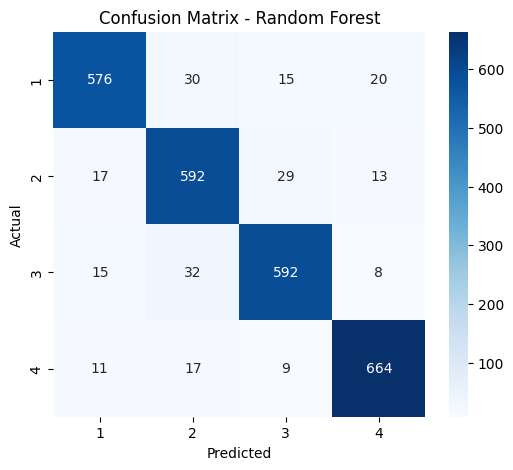

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


#Save the Best Model

In [20]:

import joblib
import numpy as np
import pandas as pd


joblib.dump(best_model, "best_weather_model.pkl")
print("Best model saved successfully!")

Best model saved successfully!


## **Weather Prediction Using User Input**

In [21]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load("/content/best_weather_model.pkl")

# Mapping numeric codes back to weather type labels
weather_mapping = {1: "Sunny", 2: "Cloudy", 3: "Rainy", 4: "Stormy"}

# ------------------ User Input Interface ------------------
print("Enter the following weather parameters:")

temperature = float(input("Temperature (°C): "))
humidity = int(input("Humidity (%): "))
wind_speed = float(input("Wind Speed (km/h): "))
precipitation = float(input("Precipitation (%): "))
cloud_cover = int(input("Cloud Cover (1-clear, 2-partly cloudy, 3-overcast, 4-cloudy): "))
pressure = float(input("Atmospheric Pressure (hPa): "))
uv_index = int(input("UV Index (0-11+): "))
season = int(input("Season (1-Winter, 2-Spring, 3-Summer, 4-Autumn): "))
visibility = float(input("Visibility (km): "))
location = int(input("Location (1-inland, 2-coastal, 3-mountain): "))

# Prepare input as DataFrame
user_input = pd.DataFrame([{
    "Temperature": temperature,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Precipitation (%)": precipitation,
    "Cloud Cover": cloud_cover,
    "Atmospheric Pressure": pressure,
    "UV Index": uv_index,
    "Season": season,
    "Visibility (km)": visibility,
    "Location": location
}])

# Make prediction
pred_code = loaded_model.predict(user_input)[0]
pred_label = weather_mapping[pred_code]

print(f"\nPredicted Weather Type: {pred_label}")


Enter the following weather parameters:
Temperature (°C): 14.0
Humidity (%): 73
Wind Speed (km/h): 9.5
Precipitation (%): 82.0
Cloud Cover (1-clear, 2-partly cloudy, 3-overcast, 4-cloudy): 2
Atmospheric Pressure (hPa): 1010.82
UV Index (0-11+): 2
Season (1-Winter, 2-Spring, 3-Summer, 4-Autumn): 1
Visibility (km): 3.5
Location (1-inland, 2-coastal, 3-mountain): 1

Predicted Weather Type: Rainy
